### Užduotis

Reikėjo rasti bendrąjį DL sprendinį, nubraižyti DL krypčių lauką ir atskirųjų sprendinių kreives šiems atvejams:

  1\. $x'(t) = x\cos(t)$
  
  2\. $x'(t) = \cos(x^2-t^2)$
  
  3\. $x'(t) = \cos(x^2-t^2)$
  
### Rezultatai

Pasirinkau naudoti Python ir dirbti su Sympy biblioteka. Iš pradžių apibrėžiu visas reikalingas funkcijas, o vėliau jas galiu kviesti pagal poreikį.

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import*
init_printing(use_unicode=True)
t = symbols('t')
x = Function('x')

def spręsk(expr, ics=None):
    eq = x(t).diff(t) - expr
    solution = dsolve(eq) # like x(t)=...
    if solution.has(O):
        print('Warning: there is no explicit solution')
        return solution
    if ics is None:
        return solution
    else:
        constants = solve(solution.rhs.subs(t, ics[0]) - ics[1], symbols('C1'))
        if len(constants)==1:
            #print('value of C1:',constants[0])
            return solution.subs({'C1':constants[0]})
        elif len(constants)==0:
            print(f'Warning: x({ics[0]})={ics[1]} is not defined')
        else:
            raise NotImplementedError(f'More than one solution for x({ics[0]})=ics[1]')
            
def braižyk(expr, fig=None, ax=None, xlim=[-3, 3], ylim=[-2, 4], size=20):
    # xlim, ylim - nurodoto tinklelio ribas
    # size - nurodo tinklelio tankį
    
    if fig is None:
        fig = plt.figure(figsize=(12, 12))
    if ax is None:
        ax = fig.gca()
        
    xstep=np.ptp(xlim)/size
    ystep=np.ptp(ylim)/size
    X, Y = np.meshgrid(np.arange(*xlim, xstep), np.arange(*ylim, ystep))
    func = lambdify([t, x(t)], expr)
    dy = func(X, Y)
    dx = np.ones(dy.shape)*ystep/xstep
    h = np.hypot(dx, dy)
    dx, dy = dx/h, dy/h # using normalized directions by default
    #n = -1
    #color_array = np.sqrt(((dx-n)/2)**2 + ((dy-n)/2)**2) # color_array is param of ax.quiver
    ax.quiver(X, Y, dx, dy, color='Teal', headlength=7) # color='Teal'
    ax.set_title("Lygtis $x'(t) = "+latex(expr)+"$")
    return fig, ax

def brėžk_kreivę(expr, ics, fig=None, ax=None, xlim=[-3, 3], ylim=[-2, 4], step=0.01):
    if fig is None:
        fig = plt.figure(figsize=(12, 12))
    if ax is None:
        ax = fig.gca()
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    
    sol = spręsk(expr, ics)
    if sol is not None:
        func = np.vectorize(lambdify(t, sol.rhs, 'numpy'))
        X = np.arange(*xlim, step)
        try:
            ax.plot(X, func(X), label=str(ics)+': $'+latex(sol.rhs)+'$')
        except NameError:
            print(sol.rhs)
            print(f'np.arange({xlim[0]},{xlim[1]},{step})')
            1/0
    return fig, ax

def kelias(expr, X, Y, xstep, ystep, direction, step):
    curve = [(X,Y)]
    for i in range(1000):
        func = lambdify([t, x(t)], expr, 'numpy')
        dy = func(*np.array([X, Y]).astype(float))
        dx = 1 #ystep/xstep
        try:
            h = np.hypot(dx, dy)
        except AttributeError:
            print('KLAIDA')
            print(np)
            print(dx)
            print(dy)
            exit
        dx, dy = direction*step * dx/h, direction*step * dy/h # using normalized directions by default
        X, Y = X+dx, Y+dy
        curve.append((X, Y))
    return curve

def brėžk(expr, ics, fig=None, ax=None, xlim=[-3, 3], ylim=[-2, 4], step=0.05, size=30):
    if fig is None:
        fig = plt.figure(figsize=(12, 12))
    if ax is None:
        ax = fig.gca()  
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    
    xstep=np.ptp(xlim)/size
    ystep=np.ptp(ylim)/size
    
    curve1 = kelias(expr, *ics, xstep, ystep, direction=1, step=step)
    curve2 = kelias(expr, *ics, xstep, ystep, direction=-1, step=step)
    curve = curve2[::-1]+curve1
    ax.plot(*zip(*curve), label=str(ics))
    #ax.scatter(*zip(*curve), label=str(ics),s=1)
    ax.set_title("Lygtis $x'(t) = "+latex(expr)+"$")
    return fig, ax


def paruošk(expr, xlim=[-7, 7], ylim=[-2, 10], lines=[], size=30):
    # xlim, ylim - keičia koordinačių ribas
    # size - reguliuoja brėžiamų krypčių tankumą
    # step - reguliuoja kreivės taškų tankumą
    solution = spręsk(expr)
    border = {'xlim':xlim, 'ylim':ylim} 
    fig, ax = braižyk(expr, **border, size=size)
    if solution.has(O):
        for line in lines: 
            brėžk(expr, line, fig, ax, **border)
    else:
        display(solution)
        for line in lines: 
            brėžk_kreivę(expr, line, fig, ax, **border)
            #brėžk(expr, line, fig, ax, **border)
    plt.legend()
    plt.show()

#### Bendrojo sprendinio radimas
Lygties $x'(t)=f(t)$ bendrąjį sprendinį galiu rasti su komanda `spręsk(f(t))`:

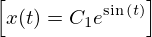

In [11]:
[spręsk(x(t)*cos(t))]

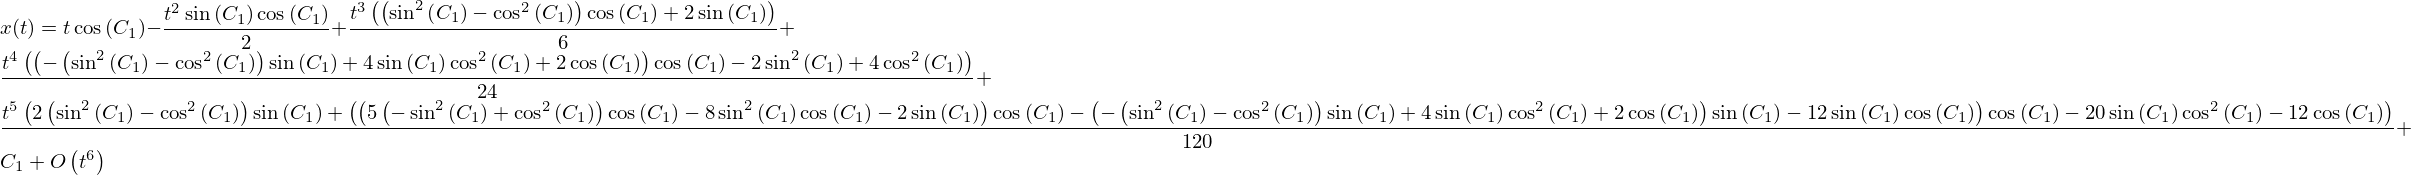

In [12]:
spręsk(cos(x(t)-t**2))

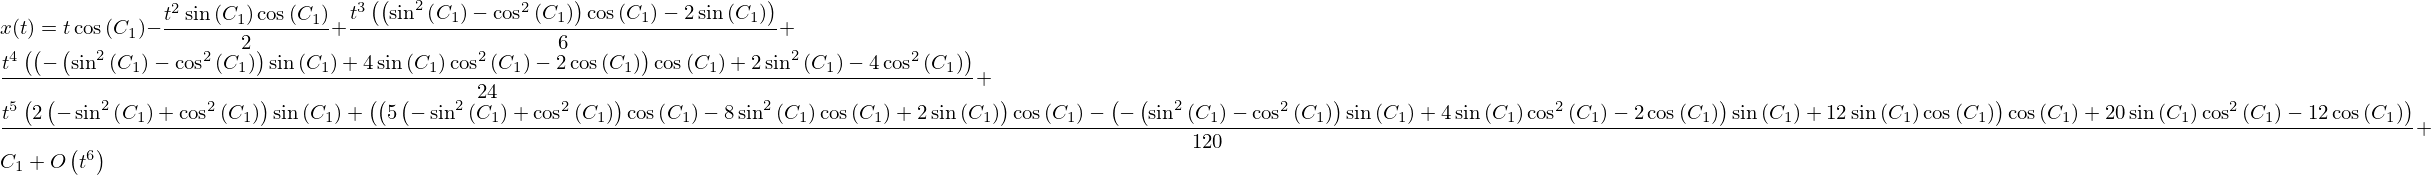

In [13]:
spręsk(cos(x(t)+t**2))

#### Krypčių lauko braižymas
Norint automatiškai braižyti formos $x'(t)=f(t)$ lygties krypčių laukus naudoju komandą `braižyk(f(t))`, o norint pavaizduoti gautą brėžinį - `plt.show()`:

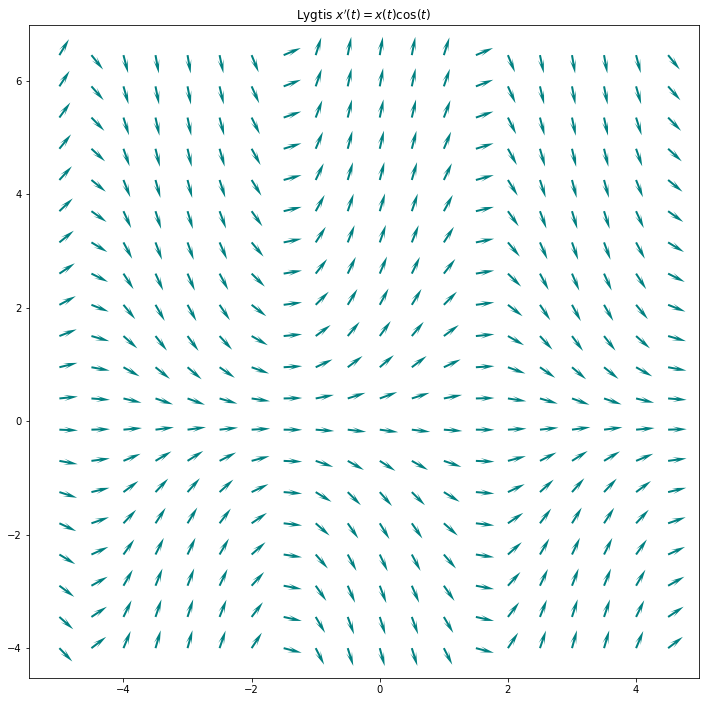

In [16]:
braižyk(x(t)*cos(t), xlim=[-5, 5], ylim=[-4, 7], size=20)
plt.show()

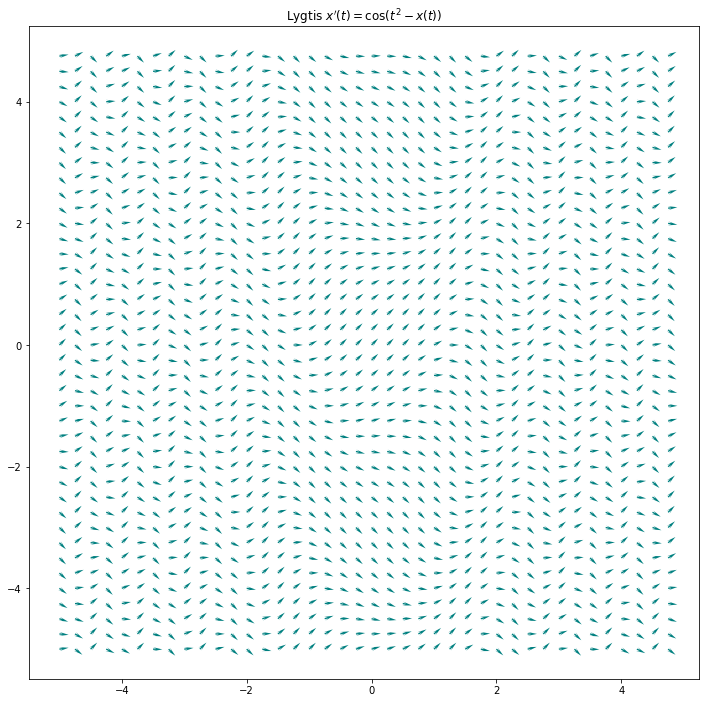

In [18]:
braižyk(cos(x(t)-t**2), xlim=[-5, 5], ylim=[-5, 5], size=40)
plt.show()

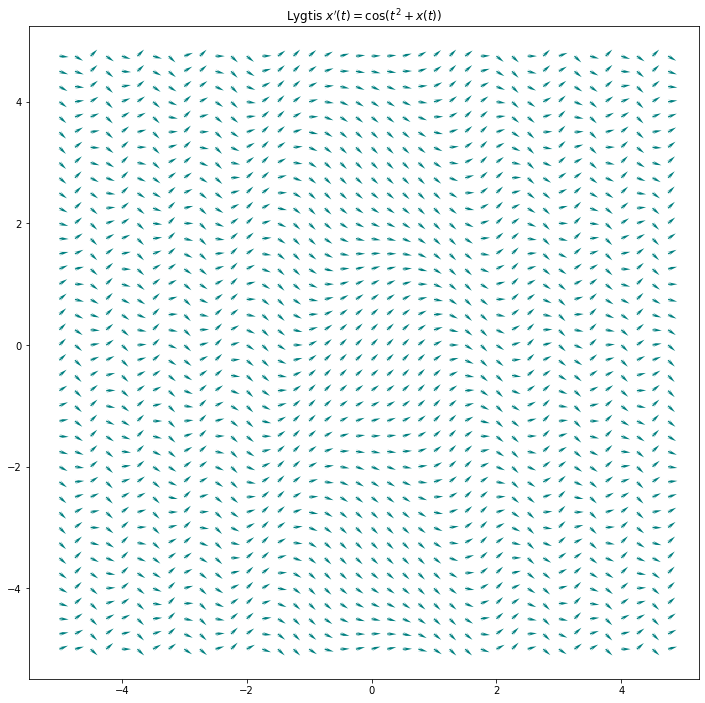

In [22]:
braižyk(cos(x(t)+t**2), xlim=[-5, 5], ylim=[-5, 5], size=40)
plt.show()

#### Atskirų kreivių braižymas
Norint braižyti atskirą kreivę lygčiai $x'(t)=f(t)$, einančią per $(a,b)$, kviečiu funkciją `brėžk_kreivę(f(x), (a,b))`. 
Ši funkcija grąžina brėžinio ir ašių objektus. Jei reikia braižyti kelias kreives, pakartotiniuose funkcijos kvietimuose šie objektai yra įvedami, papildomi ir vėl grąžinami. Komandos `plt.legend()` ir 
`plt.show()` yra skirtos prisegti legendą ir pavaizduoti brėžinį.

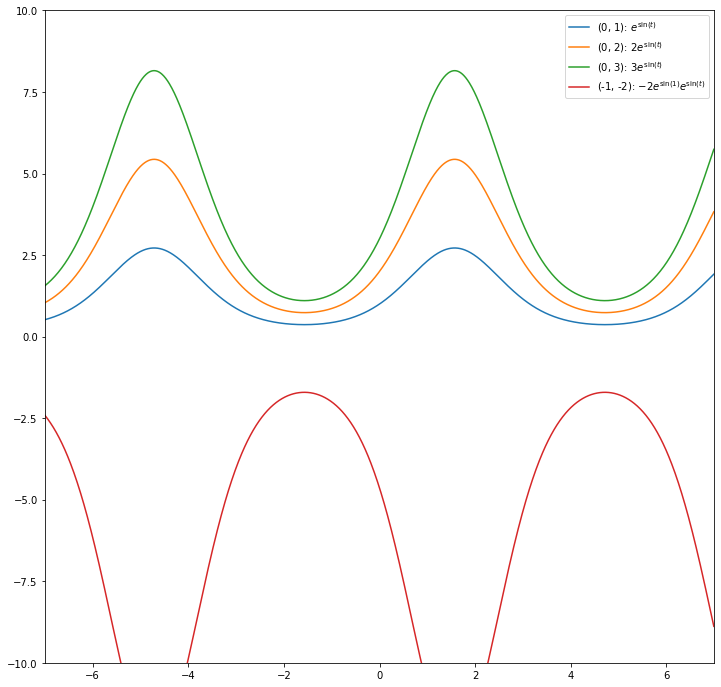

In [28]:
fig, ax = brėžk_kreivę(x(t)*cos(t), (0,1), xlim=[-7, 7], ylim=[-10, 10])
fig, ax = brėžk_kreivę(x(t)*cos(t), (0,2), fig, ax, xlim=[-7, 7], ylim=[-10, 10])
fig, ax = brėžk_kreivę(x(t)*cos(t), (0,3), fig, ax, xlim=[-7, 7], ylim=[-10, 10])
fig, ax = brėžk_kreivę(x(t)*cos(t), (-1,-2), fig, ax, xlim=[-7, 7], ylim=[-10, 10])
plt.legend()
plt.show()

AttributeError: 'Symbol' object has no attribute 'cos'

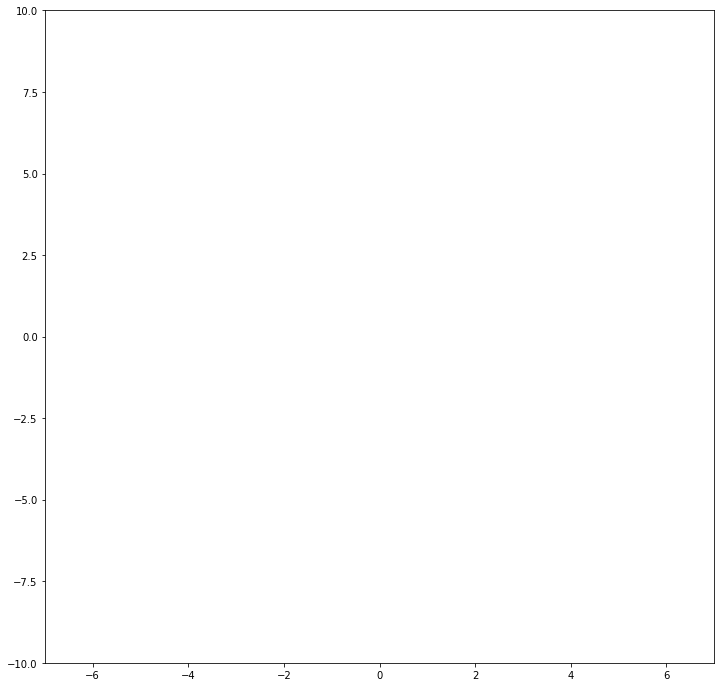

In [31]:
fig, ax = brėžk_kreivę(cos(x(t)-t**2), (0,1), xlim=[-7, 7], ylim=[-10, 10])
plt.legend()
plt.show()

#### Atskirų kreivių braižymas, kai nėra išreikštinio sprendinio
Jei lygtis $x'(t)=f(t)$  neturi išreikštinio sprendinio, tai ankstesnis metodas neveiks ir kreivė gali būti brėžiama tik remiantis skaitiniais metodais. Šiuo atveju yra konstruojama seka taškų, kur kiekvienas taškas yra pažingsniui gaunamas iš ankstesnio paslinkus jį tam tikra nuo ankstesnio taško priklausančia kryptimi. Iš pradžių yra pasirenkamas pradinis taškas $(t_0,t_0)$, tada sudaromos dvi kreivės - išeinanti iš taško palei kryptį ir išeinanti priešinga kryptimi. Komandos sintaksė yra analogiška ankstesniam atvejui, tik vietoj funkcijos `brėžk_kreivę` naudojama `brėžk`.

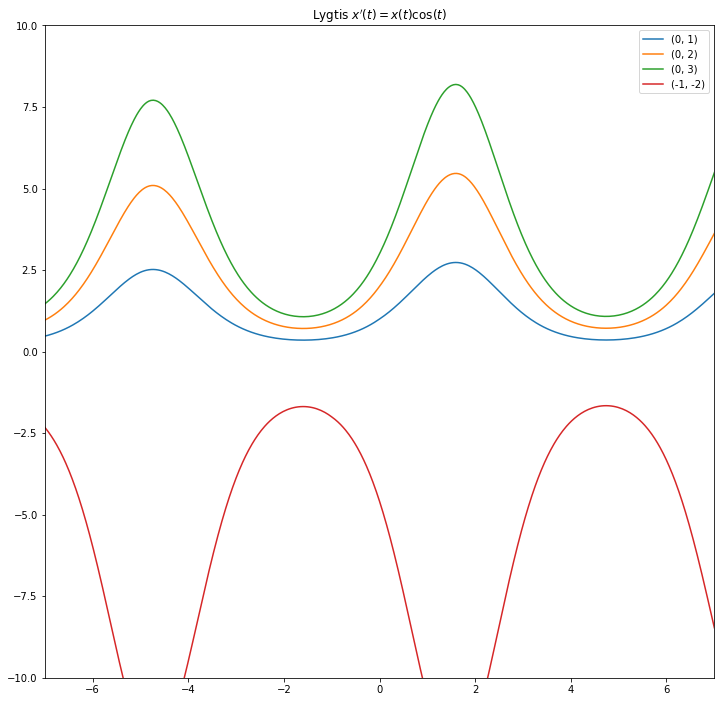

In [39]:
fig, ax = brėžk(x(t)*cos(t), (0,1), xlim=[-7, 7], ylim=[-10, 10])
fig, ax = brėžk(x(t)*cos(t), (0,2), fig, ax, xlim=[-7, 7], ylim=[-10, 10])
fig, ax = brėžk(x(t)*cos(t), (0,3), fig, ax, xlim=[-7, 7], ylim=[-10, 10])
fig, ax = brėžk(x(t)*cos(t), (-1,-2), fig, ax, xlim=[-7, 7], ylim=[-10, 10])
plt.legend()
plt.show()

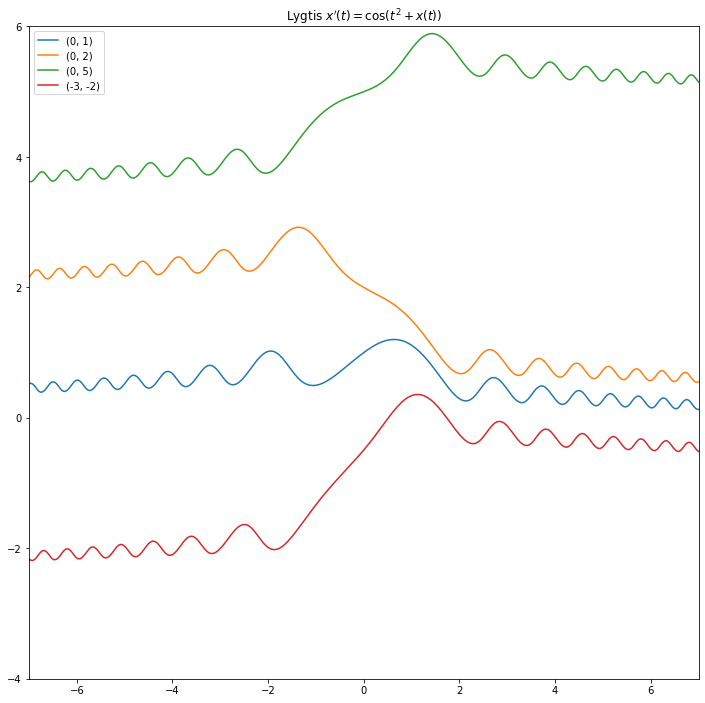

In [43]:
fig, ax = brėžk(cos(x(t)+t**2), (0,1), xlim=[-7, 7], ylim=[-4, 6])
fig, ax = brėžk(cos(x(t)+t**2), (0,2), fig, ax, xlim=[-7, 7], ylim=[-4, 6])
fig, ax = brėžk(cos(x(t)+t**2), (0,5), fig, ax, xlim=[-7, 7], ylim=[-4, 6])
fig, ax = brėžk(cos(x(t)+t**2), (-3,-2), fig, ax, xlim=[-7, 7], ylim=[-4, 6])
plt.legend()
plt.show()

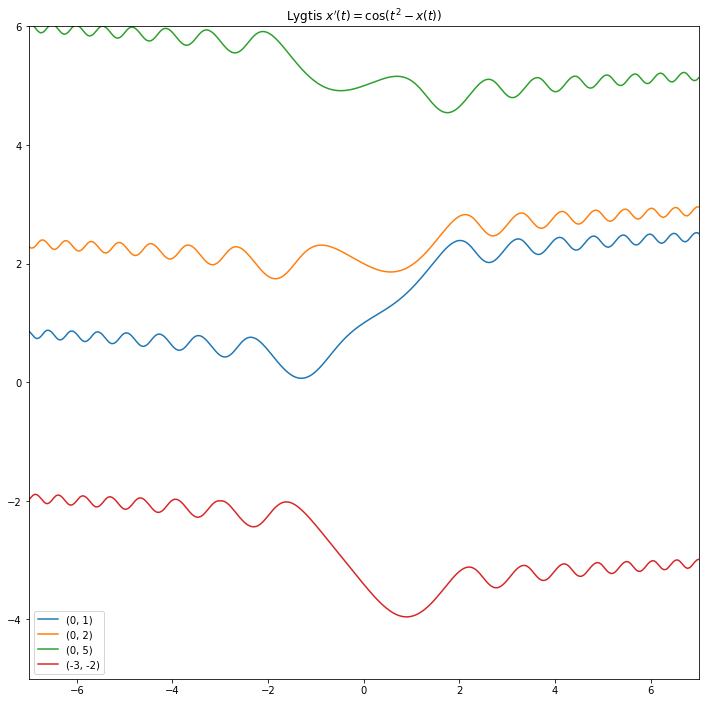

In [44]:
fig, ax = brėžk(cos(x(t)-t**2), (0,1), xlim=[-7, 7], ylim=[-5, 6])
fig, ax = brėžk(cos(x(t)-t**2), (0,2), fig, ax, xlim=[-7, 7], ylim=[-5, 6])
fig, ax = brėžk(cos(x(t)-t**2), (0,5), fig, ax, xlim=[-7, 7], ylim=[-5, 6])
fig, ax = brėžk(cos(x(t)-t**2), (-3,-2), fig, ax, xlim=[-7, 7], ylim=[-5, 6])
plt.legend()
plt.show()

#### Visi metodai - viename brėžinyje

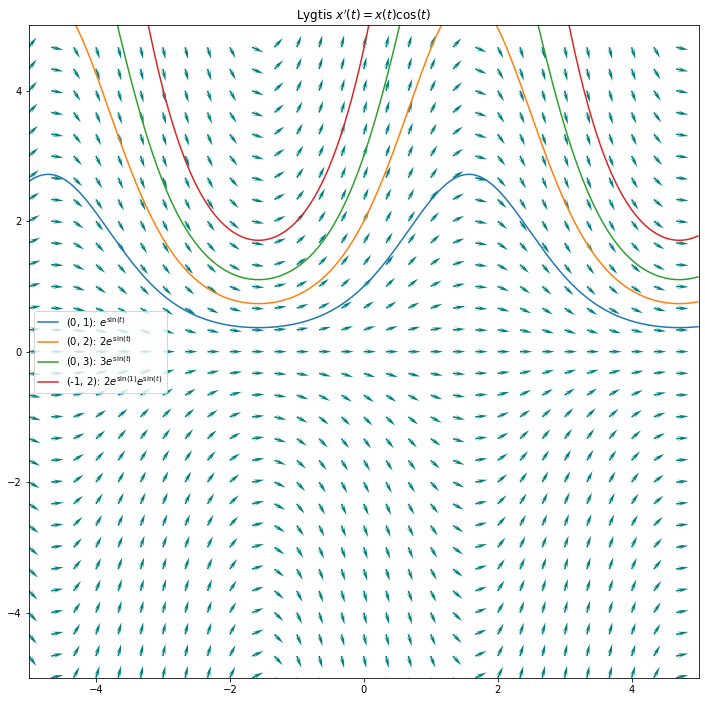

In [50]:
paruošk(expr=x(t)*cos(t), xlim=[-5,5], ylim=[-5,5], lines=[(0,1),(0,2),(0,3),(-1,2)])

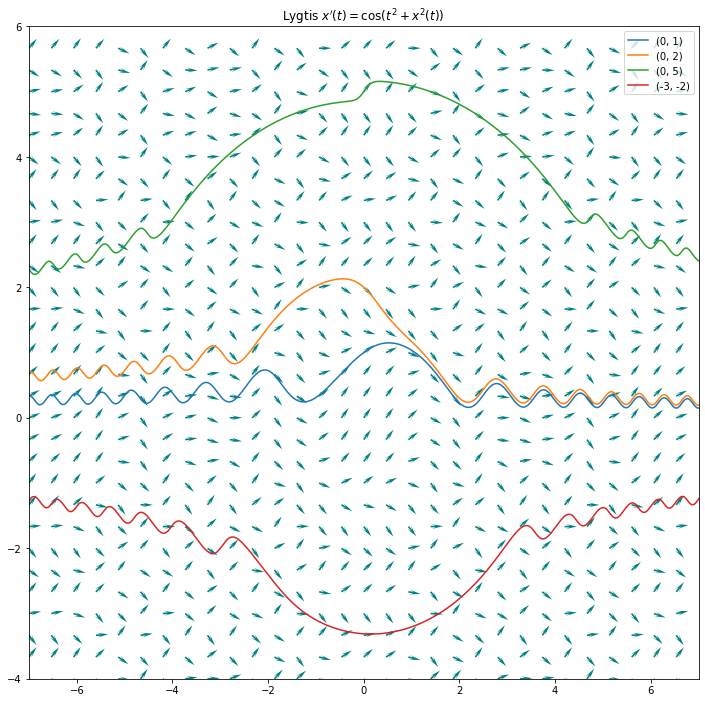

In [49]:
paruošk(expr=cos(x(t)**2+t**2), xlim=[-7, 7], ylim=[-4, 6], lines=[(0,1),(0,2),(0,5),(-3,-2)])

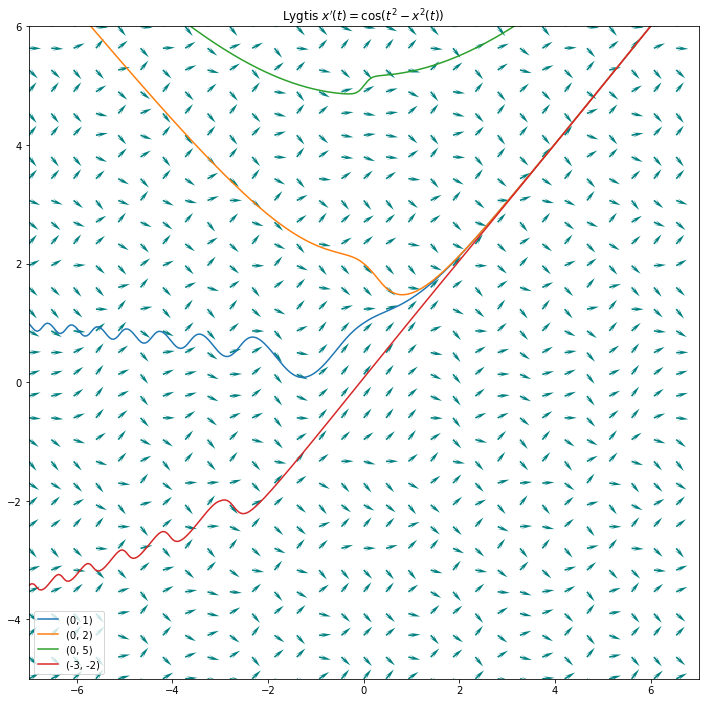

In [48]:
paruošk(expr=cos(x(t)**2-t**2), xlim=[-7, 7], ylim=[-5, 6], lines=[(0,1),(0,2),(0,5),(-3,-2)])

#### Dokumentacija
Detalesnė dokumentacija apie techninius apibrėžtų funkcijų niuansus ir veikimą su kitomis lygtimis yra [čia](diflygtys1.ipynb) arba [čia](diflygtys1.html).